In [367]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import re
from sklearn.preprocessing import StandardScaler
import funcionSpace as fs
from importlib import reload
reload(fs)

<module 'funcionSpace' from 'c:\\Users\\USUARIO\\space titanic\\funcionSpace.py'>

In [368]:
train = pd.read_csv(r"C:\Users\USUARIO\Downloads\espace\train.csv")

In [369]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [370]:
### convertimos  nuestros 3 campos  a string para una posterior transformacion
train['Transported'] = train['Transported'].astype(str)
train['CryoSleep'] = train['CryoSleep'].astype(str)
train['VIP'] = train['VIP'].astype(str)

### Llamo mi funcion desde mi modulo para convertir el true en 1 y false en 0
train['Transported_bool'] =  train['Transported'].apply(fs.boleano)
train['CryoSlepp_bool']  =  train['CryoSleep'].apply(fs.boleano)
train['VIP_bool']  =  train['VIP'].apply(fs.boleano)

### remplazo valores nulos en mi campo cabin
train["Cabin"] = train["Cabin"].fillna("np.nan/np.nan/np.nan")


'''
Separamos nuestros valor de la columna Cabin, esto debido a que
al ser una columna categorica cuadno al interpolemos para que nos cuente
como un feature nos agregarara muchas columnas, con esto pretendo agrupar
algunos rangos y disminuir las categorias de esta columna
'''
train["Cabin_Deck"] = train["Cabin"].apply(lambda x: x.split("/")[0])
train["Cabin_Side"] = train["Cabin"].apply(lambda x: x.split("/")[2])





#Remplazo los valores nulos por la moda
train["Cabin_Deck"] = train["Cabin_Deck"].fillna(train["Cabin_Deck"].mode()[0])
train["Cabin_Side"] = train["Cabin_Side"].fillna(train["Cabin_Side"].mode()[0])


#Una vez nuestros campos estan sin datos nulos, remplazamos nuestra columna de una forma mas generica
train['Cabin'] = train["Cabin_Deck"] + '/' + train["Cabin_Side"]



#Tratamos los valores nulos y los remplazamos por la moda
train["HomePlanet"] = train["HomePlanet"].fillna(train["HomePlanet"].mode()[0]) 
train["Destination"] = train["Destination"].fillna(train["Destination"].mode()[0])
train["Age"] = train["Age"].fillna(train["Age"].mode()[0])
train["CryoSlepp_bool"] = train["CryoSlepp_bool"].fillna(train["CryoSlepp_bool"].mode()[0])
train["VIP_bool"] = train["VIP_bool"].fillna(train["VIP_bool"].mode()[0])




#Aplicamos la funcion cabina, con el fin de agrupar nuestras categorias
train['Cabin'] = train['Cabin'].apply(fs.cabina)
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].mode()[0]) 

#Descartamos colulmnas que creo dado por su contexto no son relavantes para nuestro modelo predictivo
train1 = train.drop(columns=['RoomService','FoodCourt','Spa','ShoppingMall','VRDeck','Name','CryoSleep','VIP','Transported','PassengerId'])
train1.tail()

,HomePlanet,Cabin,Destination,Age,Transported_bool,CryoSlepp_bool,VIP_bool,Cabin_Deck,Cabin_Side
8688,Europa,grupo 1 babor,55 Cancri e,41.0,0,0.0,1.0,A,P
8689,Earth,grupo 7 Estribor,PSO J318.5-22,18.0,0,1.0,0.0,G,S
8690,Earth,grupo 7 Estribor,TRAPPIST-1e,26.0,1,0.0,0.0,G,S
8691,Europa,grupo 5 Estribor,55 Cancri e,32.0,0,0.0,0.0,E,S
8692,Europa,grupo 5 Estribor,TRAPPIST-1e,44.0,1,0.0,0.0,E,S


In [371]:
## Compruebo que mi data no presente valores nulos despues de mi preprocesamiento

train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomePlanet        8693 non-null   object 
 1   Cabin             8693 non-null   object 
 2   Destination       8693 non-null   object 
 3   Age               8693 non-null   float64
 4   Transported_bool  8693 non-null   int64  
 5   CryoSlepp_bool    8693 non-null   float64
 6   VIP_bool          8693 non-null   float64
 7   Cabin_Deck        8693 non-null   object 
 8   Cabin_Side        8693 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 611.4+ KB


In [372]:
#Separo mi dataframe en mis columnas numericas y categoricas para buscar su correlacion
columnas = train1.columns
columnas_cat =[]
columnas_num = []
columnas_bool =[]
for i in columnas:
    if train1[i].dtype == 'O' :
        columnas_cat.append(i)
    elif train1[i].dtype in('float64' , 'int64'):
        columnas_num.append(i)
    


In [373]:
for i in columnas_cat :
    print(f'{i}:' , train1[i].unique())


HomePlanet: ['Europa' 'Earth' 'Mars']
Cabin: ['grupo 2 babor' 'grupo 6 Estribor' 'grupo 1 Estribor' 'grupo 6 babor'
 'grupo 7 Estribor' 'grupo 7 babor' 'grupo 5 Estribor' 'grupo 4 babor'
 'grupo 3 Estribor' 'grupo 3 babor' 'grupo 4 Estribor' 'grupo 2 Estribor'
 'grupo 1 babor' 'grupo 5 babor' 'grupo 8 babor' 'grupo 8 Estribor']
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
Cabin_Deck: ['B' 'F' 'A' 'G' 'np.nan' 'E' 'D' 'C' 'T']
Cabin_Side: ['P' 'S' 'np.nan']


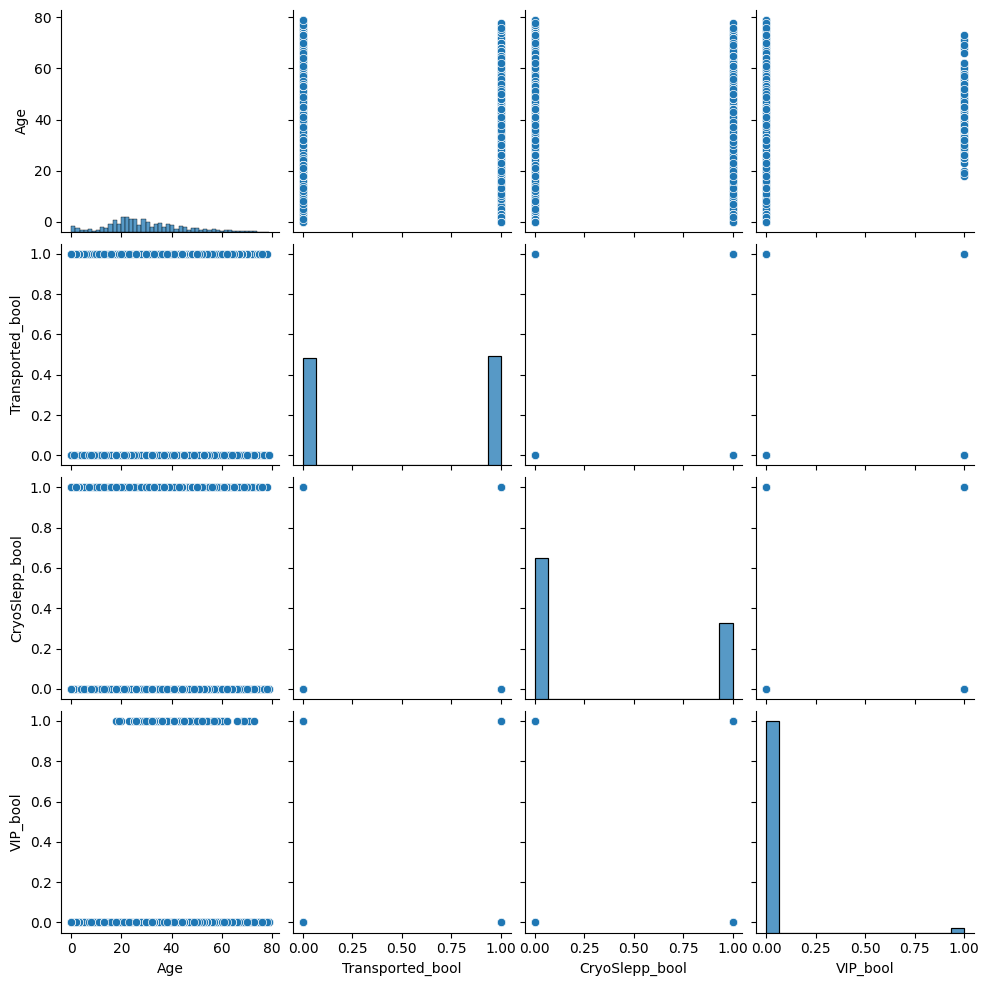

In [374]:
sns.pairplot(train1[columnas_num])
plt.show()


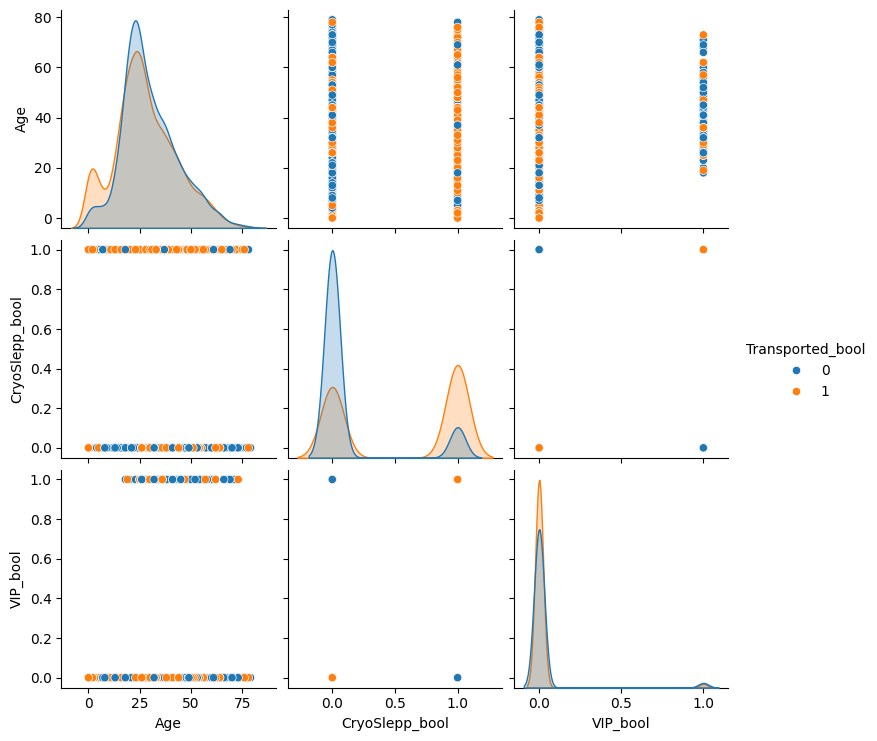

In [375]:
sns.pairplot(train1[columnas_num],hue='Transported_bool')
plt.show()

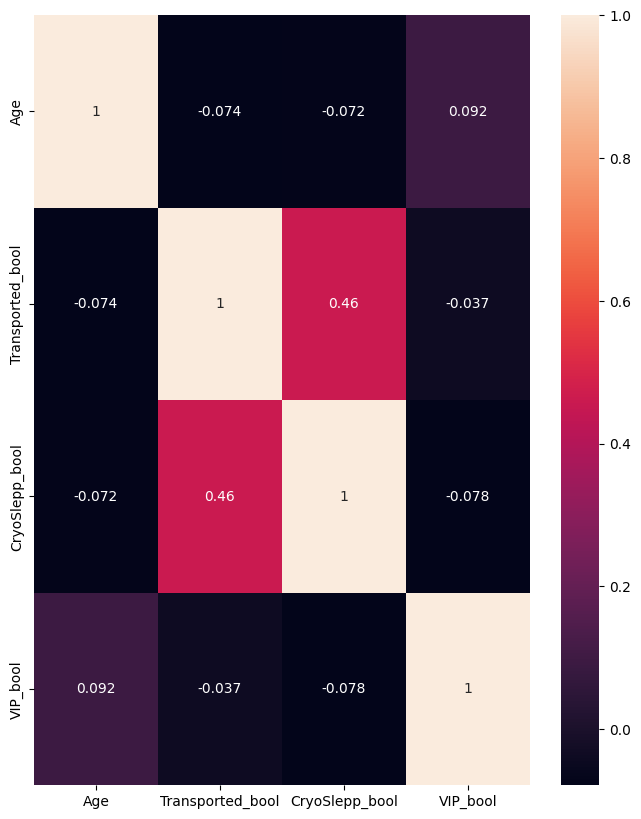

In [376]:
matriz = train1[columnas_num].corr()
plt.figure(figsize=(8,10))
sns.heatmap(matriz,annot=True)
plt.show()

In [377]:
scaler = StandardScaler()

#  Estandarizamos nuestra edad 
scaler.fit(train1[['Age']])

# Transformamos nuestra columna edad
train1['Age'] = scaler.transform(train1[['Age']])

In [378]:
#Truncamos nuestra data categorica
data1 = pd.get_dummies(train1,columns=columnas_cat,drop_first=True)
data1

,Age,Transported_bool,CryoSlepp_bool,VIP_bool,HomePlanet_Europa,HomePlanet_Mars,Cabin_grupo 1 babor,Cabin_grupo 2 Estribor,Cabin_grupo 2 babor,Cabin_grupo 3 Estribor,...,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Deck_np.nan,Cabin_Side_S,Cabin_Side_np.nan
0,0.715553,0,0.0,0.0,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,-0.329408,1,0.0,0.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,2.039169,0,0.0,1.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.297569,0,0.0,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,-0.886720,1,0.0,0.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.854881,0,0.0,1.0,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8689,-0.747392,0,1.0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
8690,-0.190079,1,0.0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
8691,0.227905,0,0.0,0.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [379]:
# Separamos nuestra data

X = data1.drop('Transported_bool',axis= 1)
y = data1['Transported_bool']

In [380]:
#  Dividimos nuestra data para ser entrenada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Index(['Age', 'CryoSlepp_bool', 'VIP_bool', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Cabin_grupo 1 babor', 'Cabin_grupo 2 Estribor',
       'Cabin_grupo 2 babor', 'Cabin_grupo 3 Estribor', 'Cabin_grupo 3 babor',
       'Cabin_grupo 4 Estribor', 'Cabin_grupo 4 babor',
       'Cabin_grupo 5 Estribor', 'Cabin_grupo 5 babor',
       'Cabin_grupo 6 Estribor', 'Cabin_grupo 6 babor',
       'Cabin_grupo 7 Estribor', 'Cabin_grupo 7 babor',
       'Cabin_grupo 8 Estribor', 'Cabin_grupo 8 babor',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_Deck_B',
       'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E', 'Cabin_Deck_F',
       'Cabin_Deck_G', 'Cabin_Deck_T', 'Cabin_Deck_np.nan', 'Cabin_Side_S',
       'Cabin_Side_np.nan'],
      dtype='object') [4.90877852e-01 3.09113473e-01 7.67380541e-03 2.40676730e-02
 2.50036123e-02 1.21253838e-03 5.55914995e-03 1.53426041e-03
 7.96031891e-03 1.19995416e-03 1.35235301e-03 1.61958950e-03
 2.79579143e-03 3.33459159e-03 2.63503055

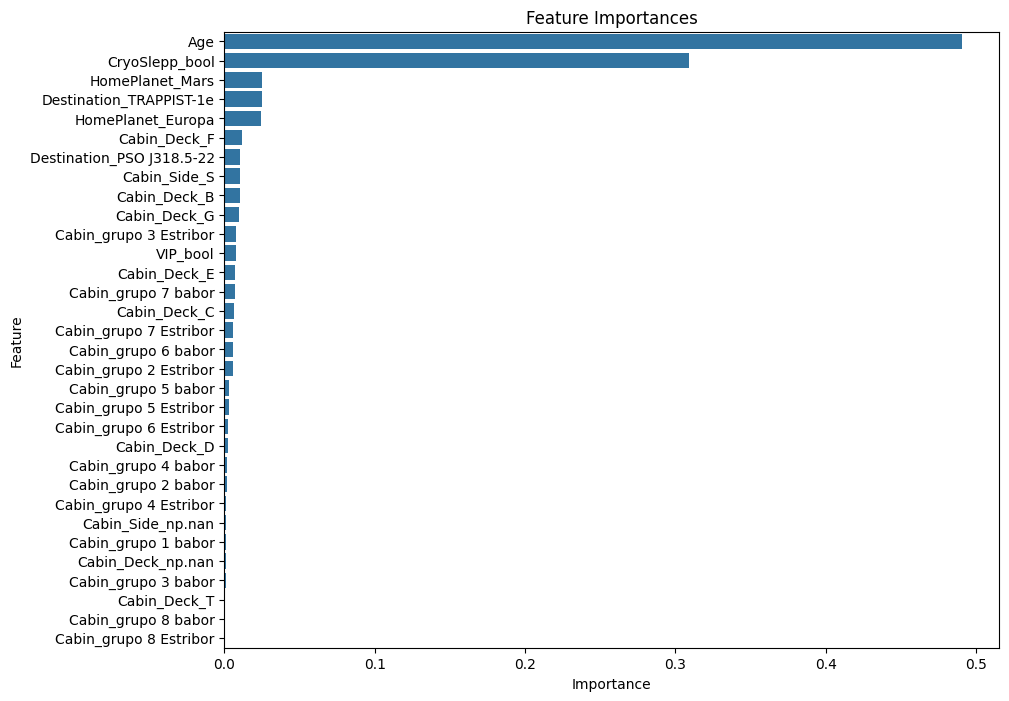

In [381]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
print(X.columns,feature_importances)

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [391]:
'''
Primeramenta se descartaron los siguientes features para nuestro modelo
RoomService','FoodCourt','Spa','ShoppingMall','VRDeck','Name','CryoSleep','VIP','Transported','PassengerId'
las primeras 6 columnas las he descartado dado el contexto que se nos presenta, pues estos son servicios 
que tiene un pasajero y pienso que no afectaria si fue transportado o no, los otros 4 se han eliminado
debido a la transformacion previa por apartir de estos campos los cuales venian con una categoria True y False
los converti a 0 y 1 para operarlos mas facilmente.

Finalmente con ramdom forest puedo ver que columnas son las que mas se pueden relacionar con mi columna a predecir
en este caso tomare aquellos features que tengan un valor mayor al 0.018
'''
features_selected = list(feature_importance_df[feature_importance_df['Importance']>0.018]['Feature'])
features_selected

['Age',
 'CryoSlepp_bool',
 'HomePlanet_Mars',
 'Destination_TRAPPIST-1e',
 'HomePlanet_Europa']

In [383]:
X_train = X_train[features_selected]
X_test = X_test[features_selected]
print(X_train.shape)
print(X_test.shape)

(7823, 5)
(870, 5)


In [385]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7091954022988506

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       443
           1       0.74      0.64      0.68       427

    accuracy                           0.71       870
   macro avg       0.71      0.71      0.71       870
weighted avg       0.71      0.71      0.71       870


Confusion Matrix:
[[345  98]
 [155 272]]


In [386]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compare models
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results[name] = cv_scores

# Print results
for name, scores in results.items():
    print(f"Model: {name}")
    print(f"Cross-validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")
    print()


Model: Random Forest
Cross-validation Scores: [0.70040253 0.70040253 0.71190339 0.69275029 0.69102417]
Mean Accuracy: 0.6992965813057384
Standard Deviation: 0.007384642993956747

Model: Support Vector Machine
Cross-validation Scores: [0.74065555 0.7239793  0.74123059 0.74683544 0.7543153 ]
Mean Accuracy: 0.7414032375788369
Standard Deviation: 0.010004127539320078

Model: Gradient Boosting
Cross-validation Scores: [0.74755607 0.72915469 0.74295572 0.74741082 0.74798619]
Mean Accuracy: 0.743012696608172
Standard Deviation: 0.007166156700557269



In [387]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize super vector machine
rf_classifier = SVC()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)
score = accuracy_score(y_pred,y_test)
print(score)

0.7367816091954023


In [388]:
import joblib
# Save the trained model to a file
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [389]:
# Load the saved Random Forest model from file
loaded_model = joblib.load('random_forest_model.pkl')

In [390]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)
print(y_pred[:10])
y_pred = loaded_model.predict(X_test)
print(y_pred[:10])

[0 0 1 0 1 0 0 0 1 0]
[0 0 1 0 1 0 0 0 1 0]
